In [1]:
# Ricordati di eseguire questa cella 
import sys;
sys.path.append('../../'); 
import jupman;

# Visualizzazione dati - soluzioni

## [Scarica zip esercizi](../../_static/visualization-exercises.zip)

[Naviga file online](https://github.com/DavidLeoni/softpython/tree/master/exercises/visualization)


## Introduzione

Excel ci permette di creare molti tipi di visualizzazione per i nostri dati ma è molto più limitato rispetto a Python ed il risultato solitamente è di qualità inferiore. In questo tutorial in particolare guarderemo:

**Grafici Matplotlib**

* grafici a punti e a linee
* posizionare grafici
* mettere oggetti e scritte in sovraimpressione
* istogrammi, grafici a torte e barre    

**Infografiche SVG e interattivi (cenni)**

* RawGraphs
* DataWrapper

**Incorporare codice HTML in Jupyter**

* calendari
* video
* mappe
   
Jupyter è molto flessibile, e permette di fare grafici interattivi, mettere insieme collezioni di notebook per creare dei veri e propri libri in formato pdf, così come creare siti web. Qua di seguito mettiamo dei cenni - in future versioni del tutorial le tratteremo più in dettaglio.


### Che fare


- scompatta lo zip in una cartella, dovresti ottenere qualcosa del genere: 

```

-jupman.py
-altri file ..
-exercises
     |- visualization
         |- visualization-exercise.ipynb     
         |- visualization-solution.ipynb
         |- altri file ..
```

<div class="alert alert-warning">

**ATTENZIONE**: Per essere visualizzato correttamente, il file del notebook DEVE essere nella cartella szippata.
</div>

- apri il Jupyter Notebook da quella cartella. Due cose dovrebbero aprirsi, prima una console e poi un browser. Il browser dovrebbe mostrare una lista di file: naviga la lista e apri il notebook `exercises/visualization/visualization-exercise.ipynb`
- Prosegui leggendo il file degli esercizi, ogni tanto al suo interno troverai delle scritte **DA FARE**, che ti chiederanno di scrivere dei comandi Python nelle celle successive. 

<div class="alert alert-warning">

**ATTENZIONE**: Ricordati di eseguire sempre la prima cella dentro il notebook. Contiene delle istruzioni come `import jupman` che dicono a Python quali moduli servono e dove trovarli. Per eseguirla, vedi le seguenti scorciatoie
</div>



Scorciatoie da tastiera:

* Per eseguire il codice Python dentro una cella di Jupyter, premi `Control+Invio`
* Per eseguire il codice Python dentro una cella di Jupyter E selezionare la cella seguente, premi `Shift+Invio`
* Per eseguire il codice Python dentro una cella di Jupyter E creare una nuova cella subito dopo, premi `Alt+Invio`
* Se per caso il Notebook sembra inchiodato, prova a selezionare `Kernel -> Restart`






## 1. Matplotlib e Numpy

Matplotlib è una libreria molto famosa per disegnare grafici in Python; è alla base di molti framework per la visualizzazione dei dati e quindi è importante capire il suo funzionamento. 

### Installazione

Per prima cosa bisogna installare la libreria usando da console:

**Windows / Anaconda**: Con Anaconda, in teoria già avete Matplotlib! Provate ad eseguire il codice che trovate nel [primo esempio](#Primo-esempio) qua sotto e vedete se viene mostrato qualcosa in Jupyter. Dovessero esserci problemi, si può sempre tentare di eseguire questo codice nell'Anaconda Prompt:

```bash
conda install matplotlib -c conda-forge
```

**Ubuntu**: eseguire nel terminale

```bash
sudo apt-get install python3-matplotlib
```

**Mac / Linux generico**: eseguire nel terminale

```bash
python3 -m pip install --user matplotlib
```

**Nota**
Se vedete errori riguardo permessi non sufficienti, potrebbe essere necessario lanciare il comando come amministratore. se questo accade, provate ad installare a livello di sistema con il comando:

```bash
sudo python3 -m pip install matplotlib
```

### Primo esempio

A sua volta [Matplotlib](http://matplotlib.org) utilizza una libreria matematica chiamata [Numpy](http://numpy.org): questa libreria viene automaticamente installata quando installiamo Matplotlib e quindi non dobbiamo servirà installarla manualmente. Queste due librerie sono molto potenti e estensive, tanto da poter coprire un corso intero per ogniuna di queste: il nostro obbiettivo però è quello di imparare le funzioni più importanti e capire il funzionamento in generale, per la documentazione completa è possibile accedere alla lista delle funzioni disponibili sui rispettivi siti internet.


Vediamo un primo esempio:

<div class="alert alert-warning">

**NOTA**: La prima volta che esegui la cella qua sotto potrebbe sembrare tutto bloccato!

Potresti anche vedere comparire un messaggio come questo: _UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment. Matplotlib is building the font cache using fc-list._

Niente paura, non è un errore ma solo un avvertimento (la linea inizia dicendo `UserWarning` non `UserError`): il rallentamento è causato soltanto dal fatto che Matplotlib vuole sapere quali font (tipi di carattere) può utilizzare per disegnare i grafici. È sufficiente aspettare qualche minuto e il processo riprenderà in maniera automatica appena la libreria completerà la ricerca. 

</div>

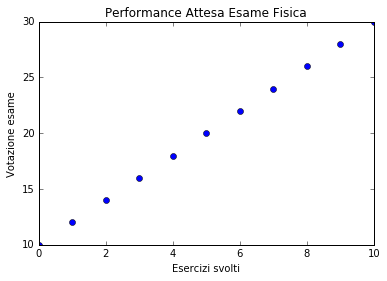

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11, 1.)
y = 2*x + 10

plt.plot(x, y, 'bo')
plt.title('Performance Attesa Esame Fisica')
plt.xlabel('Esercizi svolti')
plt.ylabel('Votazione esame')

plt.show()


Il codice qui sopra serve per disegnare il risultato atteso dei voti in relazione al numero di esercizi svolti.
Vediamo la prima riga:

```python
%matplotlib inline
```

Perché inizia con un `%`? La prima riga in realtà non è una istruzione Python ma è una istruzione per l'integrazione tra Jupyter e Matplotlib, e serve per comunicare a queste due librerie in che modo vogliamo visualizzare i grafici generati da Matplotlib. In questo caso `inline` significa che vogliamo vedere i grafici all'interno del notebook appena eseguiamo la cella che li disegna.

Guardiamo le linee successive:

```python
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
```

Le linee successive importano `matplotlib`, `matplotlib.pyplot` e `numpy`; per le ultime due useremo per brevità degli *alias* `plt` e `np`, che sono dei nomi alternativi che assegnamo noi al momento, per riferirci in modo rapido alle librerie nel codice che segue.

Una volta importate le librerie prepariamo i valori che vogliamo visualizzare. Supponiamo di avere una formula lineare che collega il numero di esercizi svolti con il risultato dell'esame, per esempio possiamo usare questa funzione: $$ y=2x+10 $$

Per tradurla in Python usando la libreria Numpy, possiamo fare così:

```python
x = np.arange(0, 11, 1.)
y = 2*x + 10
```

Per visualizzare la retta sul grafico è necessario mettere dei valori per la `x` in un vettore di Numpy. A tal fine, per eseguire questo *campionamento* scegliendo dei valori di $x$, abbiamo usato la funzione `arange` di numpy: i parametri sono simili alla funzione già fornita da Python `range` (che restituisce una serie di numeri selezionando un intervallo e opzionalmente un incremento) ma in questo caso `arange` restituisce un oggetto di tipo `numpy.ndarray` che permette di essere utilizzato all'interno di espressioni, al contrario di `tuple` o `list` che sono meno flessibili.

Guardiamo meglio la prima riga:

```python
x = np.arange(0, 11, 1.)
```
- Il primo parametro `0` rappresenta il limite inferiore (compreso nella serie)
- il secondo `11` il limite superiore (escluso dalla serie) 
- mentre il terzo `1.` rappresenta l'incremento tra un numero e quello successivo nella serie generata.

**✪ DA FARE 1.1**: Prova a usare il comando `type` per controllare quale è il tipo di valore ritornato dalla chiamata a `np.arange`

In [3]:
# scrivi qui il comando type

type(np.arange(0, 11, 1.))

numpy.ndarray

Dopo aver generato i valori di `x` e `y` in due vettori possiamo disegnare un grafico. Il grafico più semplice che si possa plottare è un grafico con dei punti nel piano e la funzione da chiamare per farlo è `plt.plot()`:

```python
plt.plot(x, y, 'bo')
```

Questa funzione può ricevere come parametro due liste di oggetti aventi *la stessa dimensione* rappresentando posizionalmente le coordinate dei punti mentre il terzo parametro, il quale è opzionale, serve per indicare lo stile dell'oggetto da disegnare, nel nostro caso `"bo"` significa colore **b**lue e la **o** dice a Python di stampare cerchi (per maggiori informazioni scrivi `help(plt.plot)`).

Ora l'oggetto `plt` contiene le informazioni riguardanti il grafico che vogliamo vedere, ma mancano ancora alcune informazioni come il titolo e le etichette sugli assi. Per settare questi valori utilizziamo i metodi `plt.title()` (per il titolo), `plt.xlabel()` (per l'etichetta dell'asse x) e `plt.ylabel()` (per l'etichetta dell'asse y):

```python
plt.title('Performance Attesa Esame Fisica')
plt.xlabel('Esercizi svolti')
plt.ylabel('Votazione esame')

```


L'ultima istruzione:

```python
plt.show()
```

è il metodo che veramente genera il grafico e pulisce l'oggetto `plt` per renderlo pronto a disegnare un nuovo grafico. Almeno per il momento, consideriamo che dopo che aver chiamato questo metodo *non sarà più possibile apportare modifiche al grafico* quindi lo chiameremo per ultimo.

**✪ DA FARE 1.2**: Riscrivi a mano qua sotto il codice visto sopra, e prova ad eseguirlo con `Ctrl+Invio`:

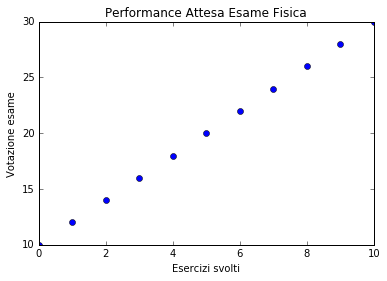

In [4]:
# scrivi qui il codice

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11, 1.)
y = 2*x + 10

plt.plot(x, y, 'bo')
plt.title('Performance Attesa Esame Fisica')
plt.xlabel('Esercizi svolti')
plt.ylabel('Votazione esame')

plt.show()


**✪ DA FARE 1.3**: Copia e incolla qua sotto l'esempio precendente, questa volta cambiando il colore della linea (usa `r` per il rosso) e lo stile della linea, usando una linea continua con il carattere `-`.


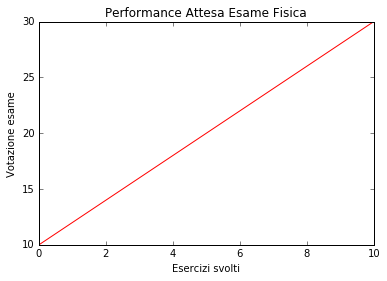

In [5]:
# scrivi qui il codice

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11, 1.)
y = 2*x + 10

plt.plot(x, y, 'r-')
plt.title('Performance Attesa Esame Fisica')
plt.xlabel('Esercizi svolti')
plt.ylabel('Votazione esame')

plt.show()

**✪ DA FARE 1.4:**: Ricopia con il copia e incolla il codice qua sotto, e prova ad aggiungere la griglia con il comando `plt.grid()`, ricordandoti che puoi sempre usare lo help con `help(plt.grid)` (nota che quando chiedi lo help non devi mettere le parentesi tonde `()` dopo il nome del metodo `grid` !):


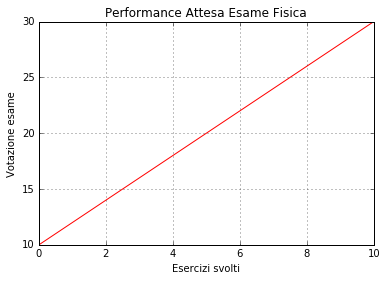

In [6]:
# scrivi qui il codice

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11, 1.)
y = 2*x + 10

plt.plot(x, y, 'r-')
plt.title('Performance Attesa Esame Fisica')
plt.xlabel('Esercizi svolti')
plt.ylabel('Votazione esame')
plt.grid()

plt.show()


**✪ DA FARE 1.5**:  Copia e incolla il codice dell'esempio precedente qua sotto, e prova ad aggiungere l'istruzione:

```python
plt.annotate(
    "Risultato minimo\nper la sufficienza",
    xy=(4, 18), arrowprops={'arrowstyle':'->'}, xytext=(6, 17.2))
```
Che cosa succede? Che cosa fanno i parametri? Prova a variare i parametri cercando nella guida di [matplotlib](https://matplotlib.org/users/annotations_guide.html)


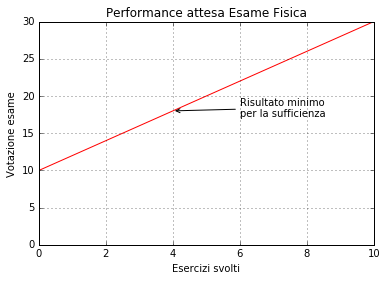

In [7]:
# scrivi qui il codice

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11, 1.)
y = 2*x + 10

plt.grid()
plt.plot(x, y, 'r-')
plt.axis([0, 10, 0, 30])
plt.annotate(
        "Risultato minimo\nper la sufficienza",
        xy=(4, 18), arrowprops={'arrowstyle':'->'}, xytext=(6, 17.2))
plt.title('Performance attesa Esame Fisica')
plt.xlabel('Esercizi svolti')
plt.ylabel('Votazione esame')
plt.show()

## 2. Stile MATLAB vs. Object-Oriented

Se hai mai usato MATLAB ti sarai reso conto che questo metodo per disegnare grafici è molto simile a come si disegnano i grafici in quell'ambiente. Per chi ha già dimestichezza con GNUplot o MATLAB, Matplotlib fornisce questo tipo di interfaccia per la creazione di grafici tramite `pyplot` (spesso chiamato solo `plt` nel codice). Matplotlib permette anche di disegnare grafici utilizzando un paradigma più proprio di Python e quindi più potente e consigliato.

Purtroppo è importante saper leggere entrambe le notazioni in quanto sono entrambe molto utilizzate.

Come prima cosa è importante conoscere i nomi degli elementi all'interno dei grafici per poter capire meglio queste differenze, esistono 4 elementi principali:

* `Figure` sono la figura completa, cioè l'immagine composta da uno (o più grafici); questo è l'unico elemento a poter essere disegnato.
* `Axes` sono i grafici all'interno di una figura, questi contengono la rappresentazione dei grafici che ci interessa,
* `Axis` sono le assi di un sistema cartesiano, ogni oggetto di tipo `Axes` ne contiene 2 o 3 e ne compongono il sistema di riferimento.
* `Artist` tutto quello che viene disegnato nell'immagine (`Figure`, `Axes`, `Axis`).

![Anatomy](anatomy.png)

Nell'esempio qui sotto viene riportata lo stesso grafico dell'esempio 1 usando il metodo *object-oriented*:


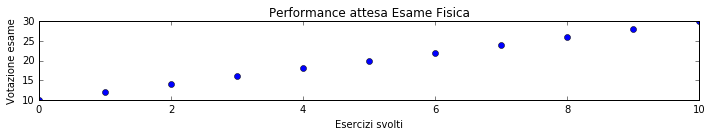

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11, 1.)
y = 2*x + 10

fig = plt.figure(figsize=(10,2))  # larghezza 10 pollici, altezza 2 pollici
ax = fig.add_subplot(111) 
ax.plot(x, y, 'o')
ax.set_title('Performance attesa Esame Fisica')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')
plt.tight_layout()
plt.show()

In [9]:
help(fig)

Help on Figure in module matplotlib.figure object:

class Figure(matplotlib.artist.Artist)
 |  The Figure instance supports callbacks through a *callbacks*
 |  attribute which is a :class:`matplotlib.cbook.CallbackRegistry`
 |  instance.  The events you can connect to are 'dpi_changed', and
 |  the callback will be called with ``func(fig)`` where fig is the
 |  :class:`Figure` instance.
 |  
 |  *patch*
 |     The figure patch is drawn by a
 |     :class:`matplotlib.patches.Rectangle` instance
 |  
 |  *suppressComposite*
 |     For multiple figure images, the figure will make composite
 |     images depending on the renderer option_image_nocomposite
 |     function.  If suppressComposite is True|False, this will
 |     override the renderer.
 |  
 |  Method resolution order:
 |      Figure
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, figsize=None, dpi=None, facecolor=None, edgecolor=None, li

Guardiamo la prima (linea 1):

```python 
fig = plt.figure()
```

utilizzo `plt.figure()` per creare recuperare una `Figure` dal modulo pyplot,

Poi in linea 2:

```python
ax = fig.add_subplot(111)
```

genero gli `Axes`, cioè il grafico vero e proprio usando il metodo `fig.add_subplot()`. Questo metodo prende in ingresso un numero di 3 cifre, ognuna di queste ha un significato particolare:

* La prima cifra rappresenta il numero di righe in cui dividere la *figura*
* La seconda cifra rappresenta il numero di colonne in cui dividere la *figura*
* La terza cifra è la cella corrispondente nella griglia generata con le prime due cifre.

Restituisce un `Axes` all'interno della figura, la cui cella è enumerata partendo da 1, da sinistra verso destra, dall'alto verso il basso.

In questo caso `111` significa che l'`Axes` ritornato sarà allineato ad una griglia di **1** riga, **1** colonna,  ed occuperà il posto del \#**1** grafico.

Il metodo successivo disegna il grafico nell'`Axes` selezionato (linea 3).

I comandi successivi sono analoghi a quelli negli esempi precedenti:

```python
ax.plot(x, y, 'o')
ax.set_title('Performance attesa Esame Fisica')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

```


, ma fai attenzione al nome e all'oggetto sul quale sono chiamati: adesso abbiamo il metodo `ax.set_title()` invece di `plt.title()` per settare il titolo, `ax.set_xlabel()` invece di `plt.xlabel()` per settare l'etichetta del'asse delle asciesse e `ax.set_ylabel()` invece di `plt.ylabel()` per settare l'etichetta del'asse delle ordinate.

L'istruzione `plt.tight_layout()`:

```python
plt.tight_layout()
plt.show()

```

infine fa spazio tra i grafici per ottimizzarlo in maniera che non si sormontino tra loro: funziona in maniera automatica e fa tutto il possibile perché questo non accada ma non può fare i miracoli: alcuni layout potrebbero comunque soffrire di qualche sovrapposizione se lo spazio disponibile è davvero limitato.

**✪ DA FARE 2.1**: Come al solito, inizia a copiare manualmente qua sotto il codice dell'esempio precedente, ed eseguilo con Control+Invio:


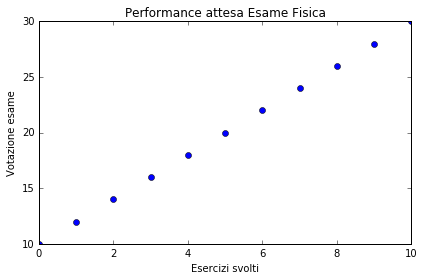

In [10]:
# scrivi qui

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11, 1.)
y = 2*x + 10

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'o')
ax.set_title('Performance attesa Esame Fisica')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

plt.tight_layout()
plt.show()

Proviamo adesso a mettere due grafici, uno di fianco all'altro. in maniera che ci siano due grafici per gli stessi dati, ma su due righe: nel grafico superiore ci sarà una linea rossa e in quello inferiore i punti saranno blu. Per realizzare questo effetto, dovrai aggiungere dei subplot alla figura. Prova a giocare un po' con i codici per i quadranti di subplot per vedere cosa succede.


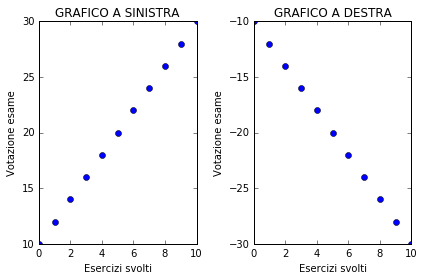

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11, 1.)
y = 2*x + 10

fig = plt.figure()
ax = fig.add_subplot(121)  # griglia a 1 riga, 2 colonne, grafico numero 1
ax.plot(x, y, 'bo')
ax.set_title('GRAFICO A SINISTRA')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

ax = fig.add_subplot(122)  # griglia a 1 riga, 2 colonne, grafico numero 2
ax.plot(x, -y, 'bo')  # notate che mettendo meno davanti a y tutti i valori nell'ndarray diventano negativi
ax.set_title('GRAFICO A DESTRA')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

plt.tight_layout()
plt.show()


**✪✪  DA FARE 2.2**: Adesso prova a copiare il grafico (anche di/con copia incolla) in maniera che ci siano due grafici per gli stessi dati, ma su due righe: nel grafico superiore ci sarà una linea rossa e in quello inferiore i punti saranno blu. Per realizzare questo effetto, dovrai aggiungere dei subplot alla figura. Prova a giocare un po' con i codici per i quadranti di subplot per vedere cosa succede.


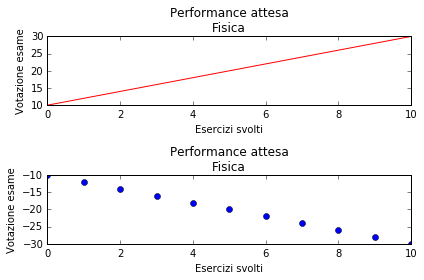

In [12]:
# scrivi qui

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11, 1.)
y = 2*x + 10


fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(x, y, 'r-')
ax.set_title('Performance attesa\nFisica')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

ax = fig.add_subplot(212)
ax.plot(x, -y, 'bo')
ax.set_title("Performance attesa\nFisica")
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

plt.tight_layout()
plt.show()

**✪✪ DA FARE 2.3**: Prova a fare 6 grafici su 3 righe e 2 colonne

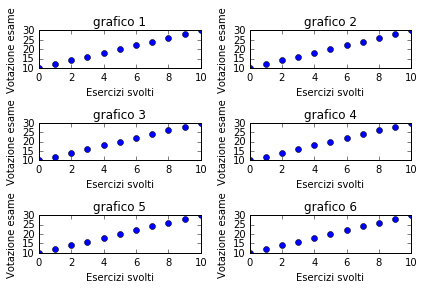

In [13]:
# scrivi qui

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11, 1.)
y = 2*x + 10


fig = plt.figure()
ax = fig.add_subplot(321)
ax.plot(x, y, 'bo')
ax.set_title('grafico 1')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

ax = fig.add_subplot(322)
ax.plot(x, y, 'bo')
ax.set_title('grafico 2')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

ax = fig.add_subplot(323)
ax.plot(x, y, 'bo')
ax.set_title('grafico 3')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

ax = fig.add_subplot(324)
ax.plot(x, y, 'bo')
ax.set_title('grafico 4')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

ax = fig.add_subplot(325)
ax.plot(x, y, 'bo')
ax.set_title('grafico 5')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

ax = fig.add_subplot(326)
ax.plot(x, y, 'bo')
ax.set_title('grafico 6')
ax.set_xlabel('Esercizi svolti')
ax.set_ylabel('Votazione esame')

plt.tight_layout()
plt.show()

## 3. Altri tipi di grafici

Oltre a questo tipo di grafico Matplotlib permette ulteriori tipi di grafici come grafici a barre, istogrammi, piechart, scatter, polari, etc. Nella documentazione è possibile trovare la spiegazione dettagliata di tutti i tipi di grafico, nei prossimi esempi ne sono riportati alcuni.

### Generiamo una distribuzione

Per cominciare, generiamo dei valori secondo una distribuzione gaussiana e mettiamoli nell'ndarray che chiamiamo `segnale`. Questi valori ci serviranno per esprimenti in seguito. Per questi esempi, useremo un nuovo modo per ottenere le variabili `fig` e `ax` con il metodo `subplots`:

(<matplotlib.figure.Figure at 0x7f6ce77ab400>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ce78eebe0>)

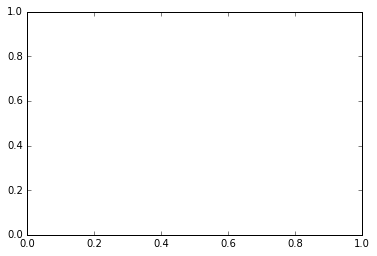

In [14]:
plt.subplots()

Se vedete `plt.subplots` ci ritorna due valori come una tupla ( e ci mostra anche il grafico per ora vuoto in Jupyter). Il primo valore è la Figure e il secondo è un Axes. Per metterli rapidamente in variabili con nomi che piacciono a noi come `fig` e `ax`, possiamo usare questa notazione:



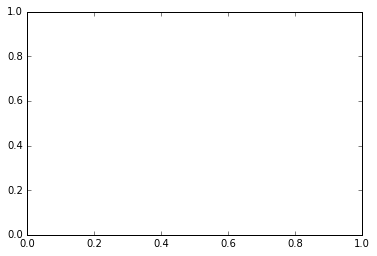

In [15]:
fig, ax = plt.subplots()

Proviamo adesso a generare un ndarray di numeri casuali, distribuiti secondo una distribuzione gaussiana. Definiamo la media `mu`, lo scarto quadratico medio `sigma`. La funzione `np.random.normal()` richiede come parametro la media, l'SQM e il numero di esempi che devono essere estratti, in questo caso 500:

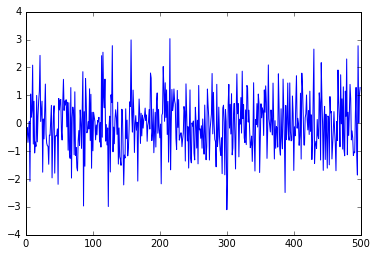

In [16]:

mu = 0  # media
sigma = 1  # sqm
num_bins = 50    # numero di colonne per l'istogramma
segnale = np.random.normal(mu, sigma, 500) # generiamo 500 valori distribuiti come una gaussiana, e mettiamoli nell'ndarray 'x'

fig, ax = plt.subplots()  # subplots restituisce una lista con 
ax.plot(segnale)
plt.show()

Come atteso, i numeri sono centrati sulla linea corrispondente a 0.

### Istogrammi

Sarebbe ora interessante produrre un istogramma che mostri in percentuale quanti numeri generati nel paragrafo precedente sono stati pari a -2, quanti pari a -1, 0, 1 , 2 , etc..   

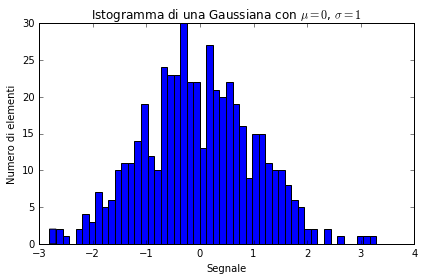

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # creiamo Figure and Axes in un comando solo

# generiamo il segnale secondo distribuzione gaussiana

mu = 0  # media
sigma = 1  # sqm
segnale = np.random.normal(mu, sigma, 500) # generiamo 500 valori distribuiti come una gaussiana, e mettiamoli nell'ndarray 'x'

# aggiungiamo l'istogramma
num_bins = 50    # numero di colonne per l'istogramma
# in questo caso hist ritorna tre valori che mettiamo in altrettante variabili
n, bins, columns = ax.hist(segnale, num_bins) 

ax.set_xlabel('Segnale')
ax.set_ylabel('Numero di elementi')
ax.set_title('Istogramma di una Gaussiana con $\mu=0$, $\sigma=1$')
fig.tight_layout()
plt.show()


Nella parte per l'istogramma, chiamiamo il metodo `ax.hist()`: questo prende come parametri l'array contenente i dati che abbiamo generato (`segnale`), e il numero di partizioni dell'istogramma. Oltre a disegnare la funzione di probabilità dentro l'Axes `ax` restituisce anche i valori numerici per ogni colonna in `n`, i valori per usati per partizionare i dati nelle varie colonne in `bins` e le colonne vere e proprie, intesi come i "rettangoli colorati" che compongono il grafico, in `columns`.

I comandi successivi li conosciamo già, ma facciamo attenzione al `set_title` questa volta: come puoi vedere ci sono dei caratteri `$` all interno del titolo: se hai mai usato o conosci *Latex* avrai sicuramente riconosciuto la notazione, infatti Matplotlib permette di inserire testo *Latex* all'interno dei grafici generati; per chi non lo conoscesse *Latex* è un linguaggio di markup che viene utilizzato per scrivere documenti di testo, molto utilizzato in ambito scientifico anche grazie alla potenza e semplicità nell'esprimere formule matematiche.



**✪ DA FARE 3.1**: Copia sotto il codice per plottare l'istogramma di qua sopra, ma invece di generare il `segnale` con distribuzione gaussiana, prova invece a settarlo uguale a liste come queste. Che grafici prevedi ? Dove saranno allineati lungo l'asse y ?

* `[1,1,1,1,1, 2,2, 3,3,3,3,3,3,3,3]`
* `[3,5,3,5]`
* `[-3,-3,-3,7,7,7,7,7]`

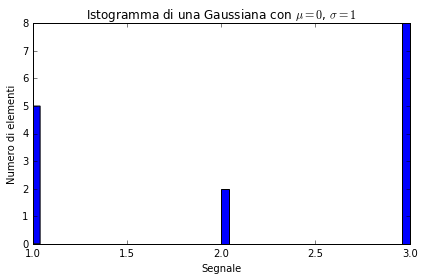

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# scrivi qui il primo grafico


fig, ax = plt.subplots()  # creiamo Figure and Axes in un comando solo

# aggiungiamo l'istogramma
num_bins = 50    # numero di colonne per l'istogramma
# in questo caso hist ritorna tre valori che mettiamo in altrettante variabili
n, bins, columns = ax.hist([1,1,1,1,1, 2,2, 3,3,3,3,3,3,3,3], num_bins) 

ax.set_xlabel('Segnale')
ax.set_ylabel('Numero di elementi')
ax.set_title('Istogramma di una Gaussiana con $\mu=0$, $\sigma=1$')
fig.tight_layout()
plt.show()

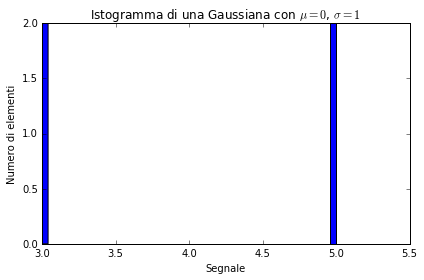

In [19]:
# scrivi qui il secondo grafico

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # creiamo Figure and Axes in un comando solo

# aggiungiamo l'istogramma
num_bins = 50    # numero di colonne per l'istogramma
# in questo caso hist ritorna tre valori che mettiamo in altrettante variabili
n, bins, columns = ax.hist([3,5,3,5], num_bins) 

ax.set_xlabel('Segnale')
ax.set_ylabel('Numero di elementi')
ax.set_title('Istogramma di una Gaussiana con $\mu=0$, $\sigma=1$')
fig.tight_layout()
plt.show()

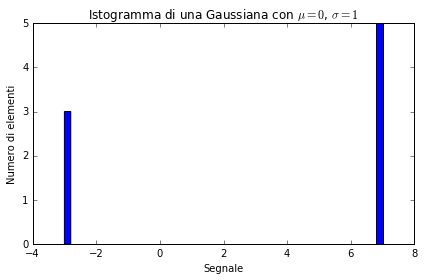

In [20]:
# scrivi qui il terzo grafico

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # creiamo Figure and Axes in un comando solo

# aggiungiamo l'istogramma
num_bins = 50    # numero di colonne per l'istogramma
# in questo caso hist ritorna tre valori che mettiamo in altrettante variabili
n, bins, columns = ax.hist([-3,-3,-3,7,7,7,7,7], num_bins) 

ax.set_xlabel('Segnale')
ax.set_ylabel('Numero di elementi')
ax.set_title('Istogramma di una Gaussiana con $\mu=0$, $\sigma=1$')
fig.tight_layout()
plt.show()

### Aggiungiamo la curva di fitting

**✪✪✪ DA FARE 3.2** Tipicamente, quando otteniamo da esperimenti una distribuzione di valori, ci interessa ricavare un modello matematico dei dati osservati. In questo caso, siamo fortunati e già sappiamo qual'è il modello giusto dei dati in `segnale`, e cioè una distribuzione gaussiana con i parametri `mu` e `sigma`. Se oltre all'istogramma facciamo anche un plot in sovraimpressione  di una curva gaussiana con quei `mu` e `sigma`, dovremmo quindi vedere una linea che segue l'istogramma, che per questo la chiameremo curva di _fitting_. Per ottenere la curva, possiamo usare i valori usati per dividere le colonne come punti sull'asse x e calcolare i valori corrispondenti sull'asse y: questo può essere fatto utilizzando la libreria `mlab` e più precisamente  il metodo `mlab.normpdf()`, che sta per Normal distribution's Probability Density Function. A questo metodo si passano:
- i valori delle x
- i parametri della normale `mu` 
- il parametro `sigma`

e lui  restituisce i valori sulla curva di densità corrispondente. 

Prova ad aggiungere la funzione di fit come descritto sopra, disegnando una linea tratteggiata con il metodo `ax.plot` visto in precedenza, aggiungendo le *due linee* di codice dove segnalato dal commento.

> **NOTA**
> Come forse hai notato i valori sull'asse y sono cambiati e la funzione `ax.hist()` ha acquisito un nuovo parametro: `normed=True`: questo serve per normalizzare i valori dell'istogramma dividendo il numero di elementi in ogni *bin* per il numero totale di elementi e permettendo di comparare l'istogramma con la funzione di probabilità associata.`

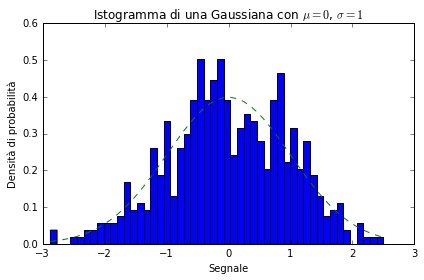

In [21]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # creiamo Figure and Axes in un comando solo

# generiamo il segnale secondo distribuzione gaussiana

mu = 0  # media
sigma = 1  # sqm
segnale = np.random.normal(mu, sigma, 500) # generiamo 500 valori distribuiti come una gaussiana, e mettiamoli nell'ndarray 'x'


# aggiungiamo l'istogramma
num_bins = 50    # numero di colonne per l'istogramma

# in questo caso hist ritorna tre valori che mettiamo in altrettante variabili
n, bins, columns = ax.hist(segnale, num_bins, normed=True)  #notare normed=True per avere valori tra 0 e 1

# DA FARE: Inserisci qui le due linee per disegnare la curva di fitting
#jupman-strip
# Qua usiamo direttamente mu e sigma che già conosciamo,
# ma con esperimenti nel mondo reale dovremmo ricavarli in qualche modo solo a partire dall'istogramma
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
#/jupman-strip

ax.set_xlabel('Segnale')
ax.set_ylabel('Densità di probabilità')
ax.set_title('Istogramma di una Gaussiana con $\mu=0$, $\sigma=1$')
fig.tight_layout()
plt.show()

## Grafici a torta  e altro ancora...

Nel prossimo esempio abbiamo il celeberrimo grafico a torta (piechart), la cui creazione è semplicissima:

1. assegnamo delle etichette (`labels`) a tutti gli spicchi;
2. decidiamo le quantità (la larghezza degli spicchi) per ogniuno degli spicchi (usando la stessa posizione in cui abbiamo enumerato le etichette in precedenza);
3. selezioniamo di quanto vogliamo separare ogni spicchio dagli altri (`esplodi` conterrà questa informazione);
5. creiamo *Figure* e *Axes*
6. disegnamo la torta usando il metodo `pie`, questo metodo prende in ingresso le quantità ma ha anche una lunga lista di parametri opzionali, nel nostro caso noi abbiamo usato:
    * `labels` cioè le etichette da apporre ad ogni spicchio,
    * `explode` vedi *punto 3*,
    * `autopct` è una stringa che serve per stampare la percentuale su ogni fetta, richiede come parametro una [stringa di formattazione](https://docs.python.org/2/library/stdtypes.html#string-formatting), in questo caso riserva una cifra intera (%***1***.1f%%) e assegna la precisione ad una cifra decimale (%1***.1f***%%), ed aggiunge il carattere `%` alla fine (%1.1f***%%*** ).
    * `startangle` è l'angolo di partenza dal quale iniziare a disegnare il grafico, 90 significa la verticale superiore del grafico.

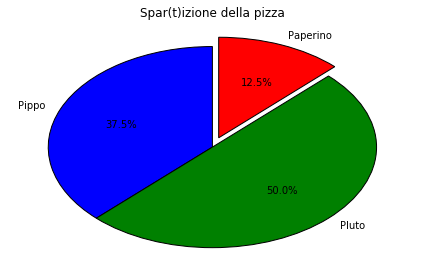

In [22]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

labels = ['Pippo', 'Pluto', 'Paperino']
y = [3, 4, 1]
esplodi = [0, 0, 0.1]

fig, ax1 = plt.subplots()
ax1.pie(y, labels=labels, explode=esplodi, autopct='%1.1f%%', startangle=90)
ax1.set_title("Spar(t)izione della pizza")

fig.tight_layout()
#fig.show()

**✪ DA FARE 3.3**: copia qua sotto manualmente il codice per disegnare il grafico a torta 

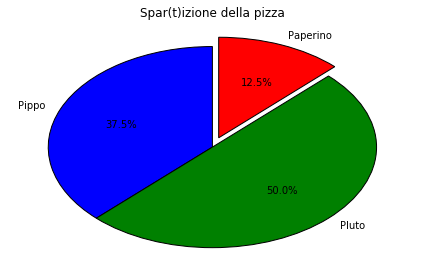

In [23]:
# scrivi qui

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

labels = ['Pippo', 'Pluto', 'Paperino']
y = [3, 4, 1]
esplodi = [0, 0, 0.1]

fig, ax1 = plt.subplots()
ax1.pie(y, labels=labels, explode=esplodi, autopct='%1.1f%%', startangle=90)
ax1.set_title("Spar(t)izione della pizza")

fig.tight_layout()
#fig.show()

**✪✪✪ DA FARE 3.4** Prova a disegnare una figura con due colonne: in quella di sinistra copia un grafico a torta, e in quella di sinistra metti un grafico a barre verticali utilizzando il metodo `ax.bar()` (primo parametro la posizione x delle barre e secondo l'altezza) per disegnare un diagramma a barre equivalente. Quale ti sembra più chiaro? Prova a giocare con i parametri e `explode` `startangle`, noterai che nel grafico a torta le proporzioni sembrano cambiare, specialmente se la dimensione degli spicchi è simile. 

Non diamo qua tutte le istruzioni per visualizzare bene il grafico a barre, prova un po' a cercare nella documentazione di [Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html). Prova anche a:

* impostare colori uguali a quelli della torta 
* impostare la larghezza delle colonne, provando diversi valori. Domanda: la larghezza delle barre può influire sulla percezione dei valori in chi osserva?
* mettere le label sotto le barre (più difficile)

Se non ti viene in mente niente puoi sempre guardare la soluzione.

**Ricordati sempre** che il comando `help()` è molto importante, usalo quando vuoi sapere di più sui parametri o sulle funzioni che stai utilizzando

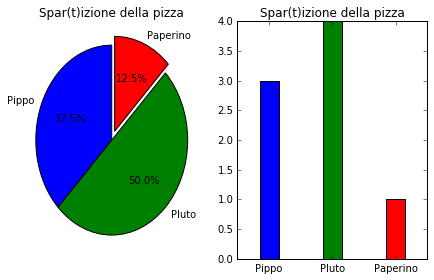

In [24]:
# scrivi qui

import matplotlib.pyplot as plt

labels = ['Pippo', 'Pluto', 'Paperino']
y = [3, 4, 1]
esplodi = [0, 0, 0.1]

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.pie(y, labels=labels, explode=esplodi, autopct='%1.1f%%', startangle=90)
ax1.set_title("Spar(t)izione della pizza")

xticks = [1,2,3] # ci serve per posizionare le barre e anche le label

ax2.bar(xticks,y, color=['b','g','r'], width=0.3, align="center")
ax2.set_title("Spar(t)izione della pizza")
ax2.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax2.set_xticks(xticks)

fig.tight_layout()


## Conclusione matplotlib

Come anticipato questa lezione non copre il 100% dei grafici e delle funzionalità presenti in Matplotlib, quindi la principale risorsa nella quale cercare esempi e documentazione è sicuramente [la pagina ufficiale di matplotlib](https://matplotlib.org/gallery/index.html) ma esistono altre risorse utili che raggruppano le funzioni utili e le loro interfacce [cheatsheet per matplotlib](https://github.com/juliangaal/python-cheat-sheet/blob/master/Matplotlib/Matplotlib.md) e [cheatsheet per numpy](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy/NumPy.md).


## Grafici SVG


E' possibile creare velocemente grafici grafici accattivanti  senza programmare in siti come [Rawgraphs](https://app.rawgraphs.io/). Una volta creati i grafici, si può  esportarli in file SVG e caricarli in Jupyter usando semplice codice  [Markdown](https://softpython.readthedocs.io/it/latest/jm-templates/project-NAME-SURNAME-ID/markdown.html). Un'altro sito da guardare è [DataWrapper](https://www.datawrapper.de/)

Nel caso di grafici interattivi,  potresti dover incollare in Jupyter del codice HTML che rappresenta il grafico - vediamo come si fa. In ogni caso tratteremo meglio grafici interattivi creati in Python nella lezione [applicazioni interattive](../interactive/interactive-solution.ipynb)

 

## importazione in Jupyter come cella HTML
    
L'HTML è il codice con cui sono scritte le pagine web. Usando i comandi 'magici' di Jupyter `%%HTML` è possibile importare dei frammenti di codice HTML nelle celle. Qua riportiamo solo qualche esempio, vedremo meglio l'HTML nel tutorial sull'[estrazione](exercises/extraction/extraction-solution.ipynb) . 

<div class="alert alert-warning">

**ATTENZIONE: le celle HTML NON sono visualizzate nei PDF esportati!**
</div>



### Google Calendar

Se vai nelle impostazioni di un Google Calendar, vedrai che c'è una voce 'Incorpora codice' con dentro del codice che inizia con `<iframe>`. 

Se copi quel codice in Jupyter, ricordandoti di mettere `%%HTML` nella prima cella vedrai il calendario.


In [6]:
%%HTML

<iframe src="https://calendar.google.com/calendar/embed?src=h5tv130eddjl9mmgh55hr2ak7k%40group.calendar.google.com&ctz=Europe%2FRome&dates=20180201%2F20180401" style="border: 0" width="800" height="600" frameborder="0" scrolling="no"></iframe>

### Video YouTube 

Se in YouTube sotto un video clicchi su _CONDIVIDI_ e poi scegli _incorpora_, vedrai del codice che inizia con `<iframe>`. Puoi incollare tale codice in Jupyter in una cella, basta che nella prima riga scrivi `%%HTML`

In [2]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/jeG49DxMsvw" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

### Mappa Umap

Sempre tramite è possibile inserire mappe, per esempio UMap - qua vediamo solo un'esempio, vedremo i dettagli nel tutorial sull'[integrazione](exercises/integration/integration-solution.ipynb)

[mappa Umap](https://umap.openstreetmap.fr/it/map/servizi-rovereto_41127#14/45.8883/11.0500) dei Servizi di Rovereto ([tutorial creazione mappa](https://docs.google.com/presentation/d/1CWo9pFl6jcR1EmDAXOmNeOayfyjfLqLR5-h5U8zxrrk/edit?usp=sharing))


In [1]:
%%HTML

<iframe width="100%" height="300px" frameBorder="0" allowfullscreen src="https://umap.openstreetmap.fr/it/map/servizi-rovereto_41127?scaleControl=false&miniMap=false&scrollWheelZoom=false&zoomControl=true&allowEdit=false&moreControl=true&searchControl=null&tilelayersControl=null&embedControl=null&datalayersControl=true&onLoadPanel=undefined&captionBar=false#14/45.8883/11.0500"></iframe><p><a href="https://umap.openstreetmap.fr/it/map/servizi-rovereto_41127">Visualizza a schermo intero</a></p>



## Esportare fogli Jupyter

Puoi esportare un singolo foglio Jupyter in diversi formati:

* formato PDF: `File->Download as-> PDF via Latex (.pdf)`
* sito a pagina singola in formato HTML:  `File->Download as-> HTML (.html)`

Per esportare un insieme di fogli Jupyter a intero sito HTML / mega PDF, puoi usare [NBSphinx](https://nbsphinx.readthedocs.io) - usato anche per generare tutto il sito di SoftPython a partire da fogli Jupyter (vedi anche [codice di SoftPython](https://github.com/DavidLeoni/softpython) su Github) !

